In [113]:
import numpy as np  #Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [114]:
df  = pd.read_csv('student_marks.csv')

In [115]:
df.head(7)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
6,6.67,76.99


In [116]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [118]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
study_hours,195.0,6.995949,1.25306,5.01,5.775,7.12,8.085,8.99
student_marks,200.0,77.933750,4.92570,68.57,73.385,77.71,82.320,86.99


## Prepare the data for Machine Learning algorithms 

In [119]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [120]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [121]:
df = df.fillna(df.mean())

In [122]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [123]:
df

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

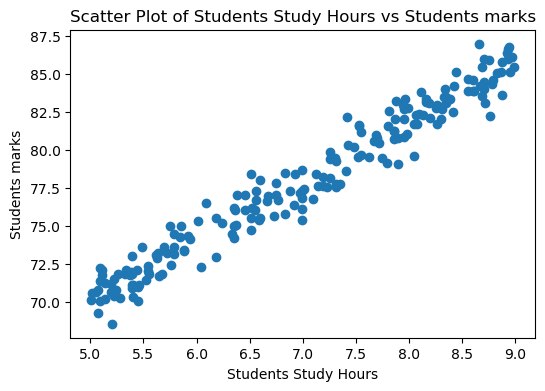

In [124]:
plt.figure(figsize=(6,4))

plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

In [125]:
X = df.drop("student_marks", axis = "columns") # split dataset
y = df["student_marks"]

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=41) #random_state = Changeable

In [127]:
X_train

,study_hours
55,8.69
185,8.05
106,5.34
83,6.01
193,7.55
...,...
65,5.45
80,8.34
140,8.60
163,6.75


In [128]:
y_train

55     85.48
185    79.63
106    72.10
83     75.36
193    79.64
       ...  
65     70.06
80     84.00
140    84.58
163    77.07
192    84.03
Name: student_marks, Length: 160, dtype: float64

In [129]:
X_test

,study_hours
96,6.995949
63,7.720000
168,7.950000
196,8.560000
68,5.070000
9,6.750000
152,8.080000
91,8.200000
51,7.310000
172,7.350000


In [130]:
y_test

96     75.39
63     80.43
168    82.68
196    84.68
68     69.27
9      77.82
152    81.70
91     82.10
51     77.77
172    77.78
30     82.27
118    73.61
29     80.17
14     83.08
165    71.94
130    73.19
90     79.56
194    74.24
38     73.08
137    71.22
190    73.14
11     83.88
49     71.41
182    86.99
170    71.18
167    70.79
153    70.78
108    74.25
61     79.41
142    82.55
66     81.25
119    75.55
22     70.67
54     82.21
128    77.01
46     77.46
146    82.75
42     71.10
41     86.41
107    73.25
Name: student_marks, dtype: float64

# select a model and train it

<img src='simLinear.png' height='600' width='400'>

In [131]:
from sklearn.linear_model import LinearRegression  # y = m * x + c
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [132]:
a = LinReg.intercept_
b = LinReg.coef_ 
a, b

(50.63364037383799, array([3.90063309]))

In [133]:
y  = b * 40 + a 
y

array([206.65896415])

In [1]:
LinReg.predict([[6.83]])

NameError: name 'LinReg' is not defined

In [135]:
y_pred  = LinReg.predict(X_test)
y_pred

array([77.92226947, 80.74652786, 81.64367348, 84.02305966, 70.40985016,
       76.96291376, 82.15075578, 82.61883175, 79.14726829, 79.30329362,
       82.34578743, 72.82824268, 79.81037592, 82.57982542, 71.61904642,
       72.63321103, 79.96640124, 75.40266052, 72.55519836, 70.68289448,
       73.21830599, 84.02305966, 70.48786282, 84.41312297, 70.87792613,
       70.40985016, 71.07295779, 73.41333765, 78.95223664, 81.09758484,
       81.2926165 , 76.3778188 , 70.3318375 , 84.80318628, 75.51967952,
       77.97707837, 81.7996988 , 71.93109707, 85.42728758, 72.94526167])

In [136]:
df2 = pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])
df2

,study_hours,student_marks_original,student_marks_predicted
0,6.995949,75.39,77.922269
1,7.720000,80.43,80.746528
2,7.950000,82.68,81.643673
3,8.560000,84.68,84.023060
4,5.070000,69.27,70.409850
5,6.750000,77.82,76.962914
6,8.080000,81.70,82.150756
7,8.200000,82.10,82.618832
8,7.310000,77.77,79.147268
9,7.350000,77.78,79.303294


In [139]:
LinReg.score(X_test,y_test) * 100

95.85094454640198

<Axes: ylabel='Density'>

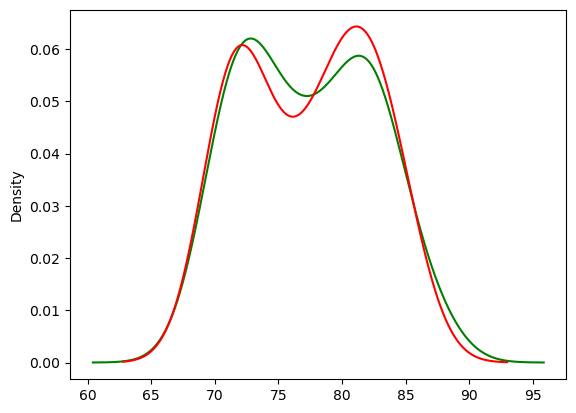

In [140]:
df2['student_marks_original'].plot(kind='kde',color='g') #green line---> original
df2['student_marks_predicted'].plot(kind='kde',color='r') #red line-----> Predicted